In [1]:
__author__ = 'fbb'
import pylab as pl


import pandas as pd
import os
import json

s = json.load(open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json'));
pl.rcParams.update(s)

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/test_fiona/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)
/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/test_fiona/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [13]:
fdny = pd.read_csv(
    "https://data.cityofnewyork.us/api/views/32y8-s55c/" + 
    "rows.csv?accessType=DOWNLOAD")
#os.getenv("PUI2015")+"/FDNY_Line_Of_Duty_Deaths.csv")
fdny.tail()


,Rank,Name,Unit,Date
1164,LIEUTENANT,JOHN H. MARTINSON,ENGINE 249,"January 3, 2008"
1165,FIREFIGHTER,JAMEL M. SEARS,BOT,"November 11, 2008"
1166,LIEUTENANT,"ROBERT J. RYAN, JR.",ENGINE 155,"November 23, 2008"
1167,FIREFIGHTER,PAUL WARHOLA,ENGINE 221,"August 14, 2009"
1168,LIEUTENANT,RICHARD A. NAPPI,ENGINE 237,"April 16, 2012"


converting dates to datetime

In [14]:
pd.to_datetime(fdny.Date).head()

0   1865-08-24
1   1865-11-08
2   1865-12-02
3   1865-12-14
4   1866-05-21
Name: Date, dtype: datetime64[ns]

In [15]:
#to remove the hours i apply a function to my converter 
#which extracts the date only from the new datetime object
#the dataset has since been corrected so that all time stamps are same format
fdny.Date = pd.to_datetime(fdny.Date).apply(lambda x: x.date())
fdny.head()

,Rank,Name,Unit,Date
0,FIREFIGHTER,ROBERT WINTRINGHAM,ENGINE 1,1865-08-24
1,FIREFIGHTER,GEORGE BELL,ENGINE 8,1865-11-08
2,FIREFIGHTER,THOMAS IRVIN,ENGINE 4,1865-12-02
3,FIREFIGHTER,DOMINICK SICOT,ENGINE 4,1865-12-14
4,FIREFIGHTER,PETER H. WALSH,ENGINE 5,1866-05-21


#### NOTE: for now I have a series of timestamps: this is NOT really a timeseries. Most of the time "time series"  identifies a dataset with observations at  regular intervals 
#### I cas bin the data in time intervals to have a proper timeseries
#### a time series is data as a function of time. By binning these data I have counts of deaths as a function of time. I can keep them at the day level.

In [16]:
FSNYts = fdny[['Date', 'Name']].groupby('Date').count()#.agg('count')
FSNYts.rename(index=str, columns={"Name": "FDNY_deaths"}, inplace=True)
FSNYts.head()

,FDNY_deaths
Date,
1865-08-24,1
1865-11-08,1
1865-12-02,1
1865-12-14,1
1866-05-21,2


Text(0,0.5,'deaths')

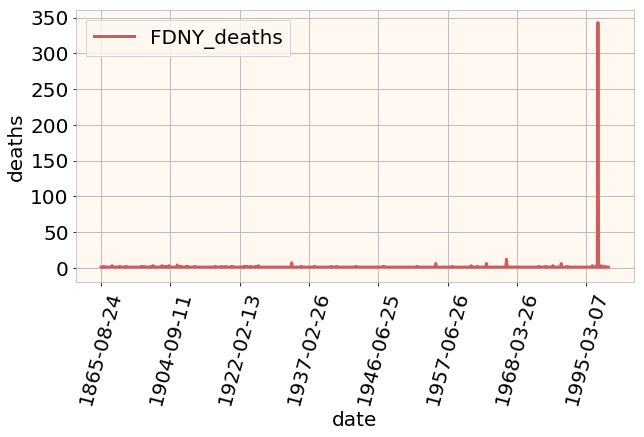

In [17]:
ax = FSNYts.plot(figsize=(10,5), color="IndianRed")

pl.xticks(rotation=75, fontsize=20)
pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.xlabel("date", fontsize=20)
pl.ylabel("deaths", fontsize=20)

## because all data are in a very small region of the y axis I am going to log space, at this stage only for visualization purposes

/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/test_fiona/lib/python3.5/site-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


Text(0.5,0,'Date')

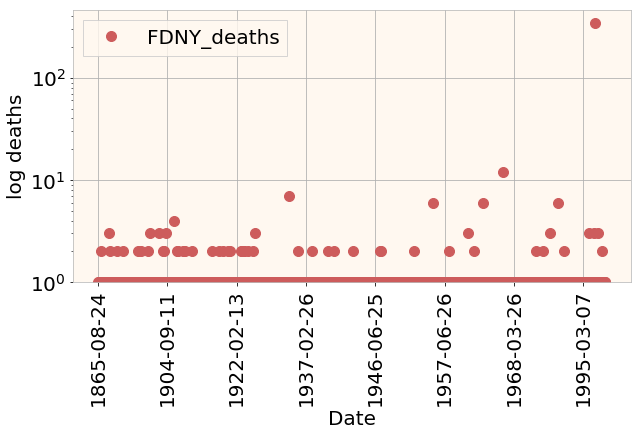

In [18]:
ax = FSNYts.plot(logy=True, figsize=(10,5), style=".", ms=20, color="IndianRed")
pl.xticks(rotation=90, fontsize=20)

pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.ylabel("log deaths", fontsize=20)
pl.xlabel("Date", fontsize=20)

/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/test_fiona/lib/python3.5/site-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


Text(0.5,0,'Date')

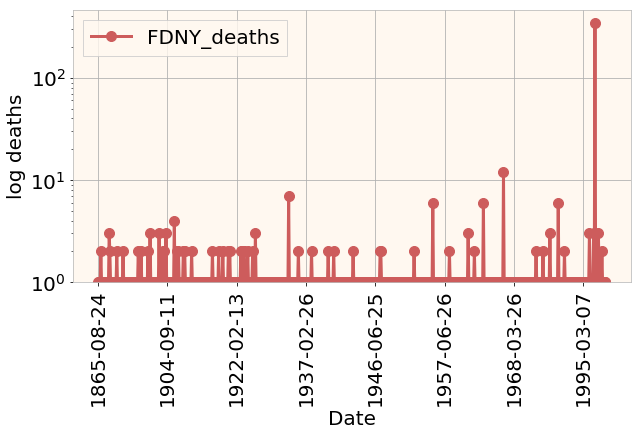

In [19]:
ax = FSNYts.plot(logy=True, figsize=(10,5), style=".-", ms=20, color="IndianRed")
pl.xticks(rotation=90, fontsize=20)

pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.ylabel("log deaths", fontsize=20)
pl.xlabel("Date", fontsize=20)

# The mean and stardand deviation of the time series can be used to set a 3-sigma threshold

## every value that is more then 3 sigmas away from the mean can be flagged as an event

In [20]:
print ("mean deaths by day {:.2f}".format(FSNYts['FDNY_deaths'].mean()))
print ("stdev deaths by day {:.2f}".format(FSNYts['FDNY_deaths'].std()))
thresholds = [FSNYts['FDNY_deaths'].mean() + 3 * FSNYts['FDNY_deaths'].std(), 
              FSNYts['FDNY_deaths'].mean() - 3 * FSNYts['FDNY_deaths'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print ("earliest datapoint", min(FSNYts.index), "-", 
       FSNYts.iloc[FSNYts.index == min(FSNYts.index)].FDNY_deaths.values[0], "deaths")

mean deaths by day 1.59
stdev deaths by day 12.64
3-sigma thresholds 39.53 -36.34
earliest datapoint 1865-08-24 - 1 deaths


/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/test_fiona/lib/python3.5/site-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


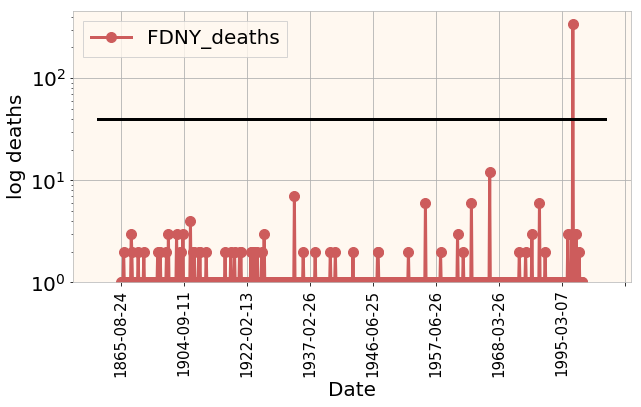

In [11]:
ax = FSNYts.plot(logy=True, figsize=(10,5), style=".-", ms=20, color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k')
pl.xticks(rotation=90, fontsize=15)
pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.ylabel("log deaths", fontsize=20)
pl.xlabel("Date", fontsize=20);

In [21]:
FSNYts.loc[(FSNYts.FDNY_deaths > thresholds[0])]

,FDNY_deaths
Date,
2001-09-11,343


# What other events are significant? We can remove 9/11 and look for more outliers

In [22]:
FSNYts.loc[(FSNYts.FDNY_deaths > thresholds[0])] = np.nan

mean deaths by day 1.13
stdev deaths by day 0.65
earliest datapoint 1865-08-24


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.,  900.]), <a list of 11 Text xticklabel objects>)

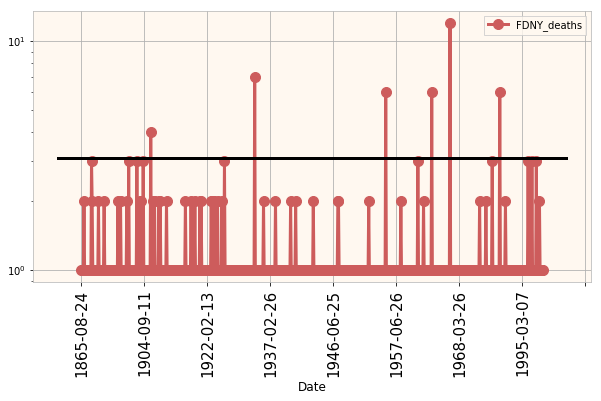

In [23]:
print ("mean deaths by day {:.2f}".format(FSNYts['FDNY_deaths'].mean()))
print ("stdev deaths by day {:.2f}".format(FSNYts['FDNY_deaths'].std()))
thresholds = [FSNYts['FDNY_deaths'].mean() + 3 * FSNYts['FDNY_deaths'].std(), 
              FSNYts['FDNY_deaths'].mean() - 3 * FSNYts['FDNY_deaths'].std()]
print ("earliest datapoint", min(FSNYts.index))
ax = FSNYts.plot(logy=True, figsize=(10,5), style=".-", ms=20, color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color="Black", lw=3)
pl.xticks(rotation=90, fontsize=15)


In [24]:
FSNYts.loc[(FSNYts.FDNY_deaths>thresholds[0])]

,FDNY_deaths
Date,
1906-03-26,4.0
1932-08-01,7.0
1956-04-04,6.0
1962-10-26,6.0
1966-10-17,12.0
1978-08-02,6.0


[see: http://www.nytimes.com/2006/10/17/nyregion/17fire.html?pagewanted=all&_r=0]("http://www.nytimes.com/2006/10/17/nyregion/17fire.html?pagewanted=all&_r=0)

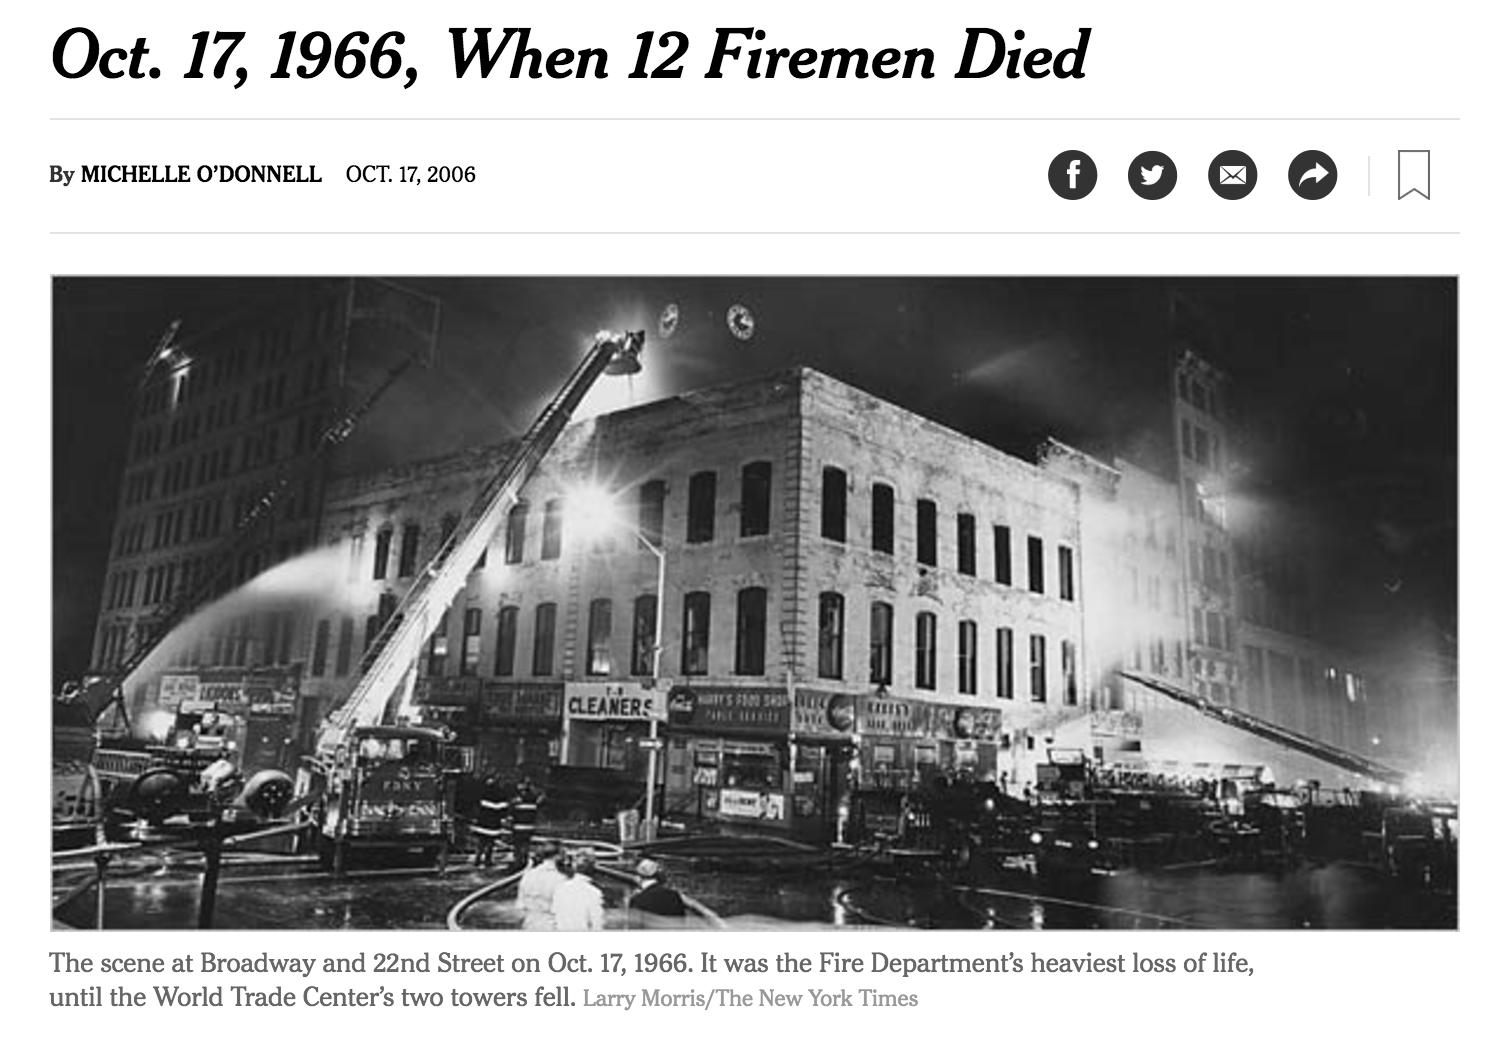

In [25]:
from IPython.core.display import Image, display
display(Image('fdnydeaths.png', width=900, unconfined=True))
